In [ ]:
# conda install -c anaconda py-xgboost

In [1]:
import xgboost
print(xgboost.__version__)

1.3.3


In [2]:
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features,columns=dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
cancer_df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X_features,y_label,
                                                test_size=0.2,
                                                random_state=156)
print(X_train.shape,X_test.shape)

(455, 30) (114, 30)


In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test,pred,pred_proba):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차행렬:\n',confusion)
    print('정확도:{:.4f},정밀도:{:.4f},재현율:{:.4f},F1:{:.4f}, \
          AUC:{:.4f}'.format(accuracy,precision,recall,f1,roc_auc))

In [12]:
# 사이킷런 Wrapper XGBooster 적용
from xgboost import XGBClassifier

evals = [(X_test,y_test)]
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate=0.1,
                           max_depth = 3)
xgb_wrapper.fit(X_train,y_train,early_stopping_rounds=400, 
                eval_set=evals, eval_metric='logloss',verbose=True)
ws400_preds = xgb_wrapper.predict(X_test)
ws400_preds_proba = xgb_wrapper.predict_proba(X_test)[:,1]


[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15473
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

[238]	validation_0-logloss:0.08639
[239]	validation_0-logloss:0.08634
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.08619
[242]	validation_0-logloss:0.08625
[243]	validation_0-logloss:0.08626
[244]	validation_0-logloss:0.08629
[245]	validation_0-logloss:0.08622
[246]	validation_0-logloss:0.08640
[247]	validation_0-logloss:0.08635
[248]	validation_0-logloss:0.08628
[249]	validation_0-logloss:0.08645
[250]	validation_0-logloss:0.08629
[251]	validation_0-logloss:0.08631
[252]	validation_0-logloss:0.08636
[253]	validation_0-logloss:0.08639
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.08644
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08646
[258]	validation_0-logloss:0.08639
[259]	validation_0-logloss:0.08644
[260]	validation_0-logloss:0.08646
[261]	validation_0-logloss:0.08649
[262]	validation_0-logloss:0.08644
[263]	validation_0-logloss:0.08647
[264]	validation_0-logloss:0.08632
[265]	validation_0-logloss:0.08649
[266]	validation_0-l

In [16]:
get_clf_eval(y_test,ws400_preds,ws400_preds_proba)

오차행렬:
 [[35  2]
 [ 1 76]]
정확도:0.9737,정밀도:0.9744,재현율:0.9870,F1:0.9806,           AUC:0.9951


In [13]:
from xgboost import XGBClassifier

evals = [(X_test,y_test)]
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate=0.1,
                           max_depth = 3)
xgb_wrapper.fit(X_train,y_train,early_stopping_rounds=100, 
                eval_set=evals, eval_metric='logloss',verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_preds_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15473
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

[238]	validation_0-logloss:0.08639
[239]	validation_0-logloss:0.08634
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.08619
[242]	validation_0-logloss:0.08625
[243]	validation_0-logloss:0.08626
[244]	validation_0-logloss:0.08629
[245]	validation_0-logloss:0.08622
[246]	validation_0-logloss:0.08640
[247]	validation_0-logloss:0.08635
[248]	validation_0-logloss:0.08628
[249]	validation_0-logloss:0.08645
[250]	validation_0-logloss:0.08629
[251]	validation_0-logloss:0.08631
[252]	validation_0-logloss:0.08636
[253]	validation_0-logloss:0.08639
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.08644
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08646
[258]	validation_0-logloss:0.08639
[259]	validation_0-logloss:0.08644
[260]	validation_0-logloss:0.08646
[261]	validation_0-logloss:0.08649
[262]	validation_0-logloss:0.08644
[263]	validation_0-logloss:0.08647
[264]	validation_0-logloss:0.08632
[265]	validation_0-logloss:0.08649
[266]	validation_0-l

In [14]:
get_clf_eval(y_test,ws100_preds,ws100_preds_proba)

오차행렬:
 [[34  3]
 [ 1 76]]
정확도:0.9649,정밀도:0.9620,재현율:0.9870,F1:0.9744,           AUC:0.9954


In [18]:
evals = [(X_test,y_test)]
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate=0.1,
                           max_depth = 3)
xgb_wrapper.fit(X_train,y_train,early_stopping_rounds=10, 
                eval_set=evals, eval_metric='logloss',verbose=True)
ws10_preds = xgb_wrapper.predict(X_test)
ws10_preds_proba = xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test,ws10_preds,ws10_preds_proba)

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15473
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

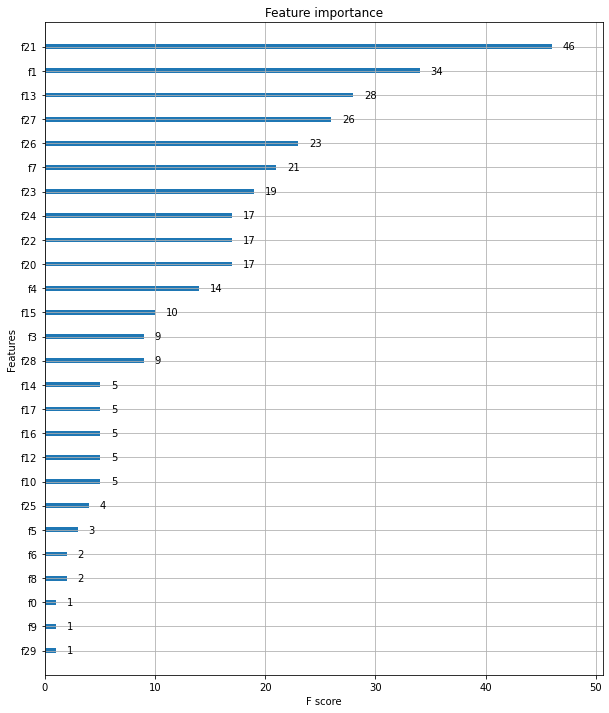

In [19]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_wrapper,ax=ax)

In [20]:
import lightgbm
print(lightgbm.__version__)

3.2.1


In [21]:
from lightgbm import LGBMClassifier
dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

X_train,X_test,y_train,y_test = train_test_split(ftr,target,
                                                test_size=0.2,
                                                random_state=156)
lgbm_wrapper = LGBMClassifier(n_estimators=400)
evals = [(X_test,y_test)]
lgbm_wrapper.fit(X_train,y_train,early_stopping_rounds=100,
                eval_metric='logloss',eval_set=evals,verbose=True)
preds = lgbm_wrapper.predict(X_test)
preds_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_loglo

In [22]:
get_clf_eval(y_test,preds,preds_proba)

오차행렬:
 [[33  4]
 [ 1 76]]
정확도:0.9561,정밀도:0.9500,재현율:0.9870,F1:0.9682,           AUC:0.9905


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

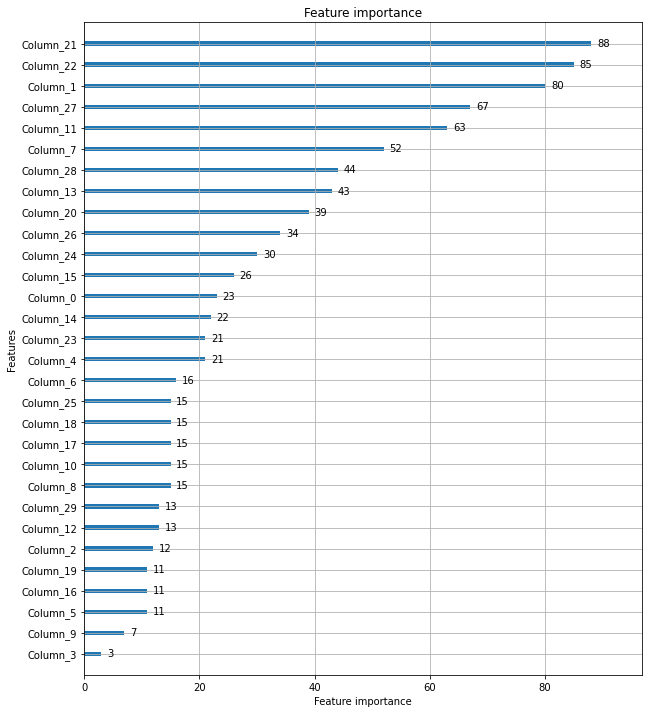

In [23]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper,ax=ax)

[과제] - 캐글 산탄데르 고객 만족 예측

Q. 산탄데르 은행의 고객만족 예측 분석을 수행하세요.
- 370개의 피처로 주어진 데이터 세트 
- 클래스 레이블명은 target 1이 불만, 0은 만족
- 모델의 성능 평가는 ROC_AUC
- 데이터는 https://www.kaggle.com/c/santander-customer-satisfaction/data

In [25]:
cust_df = pd.read_csv('dataset/santander/train_santander.csv')
print(cust_df.shape)
cust_df.head()

(76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [27]:
cust_df.TARGET.value_counts()
uns_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('불만족 비중:{:.2f}'.format((uns_cnt/total_cnt)))

불만족 비중:0.04


In [28]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [29]:
cust_df.var3.value_counts()[:10]

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64

In [30]:
cust_df['var3'].replace(-999999,2,inplace=True)
cust_df.drop('ID',axis=1,inplace=True)
X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]
X_features.shape

(76020, 369)

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X_features,y_labels,
                                                test_size=0.2,
                                                random_state=0,
                                                stratify=y_labels)
train_cnt = y_train.count()
test_cnt = y_test.count()
print(X_train.shape,X_test.shape)
print('학습 분포 비율:\n',y_train.value_counts()/train_cnt)
print('\n 테스트 분포 비율:\n', y_test.value_counts()/test_cnt)

(60816, 369) (15204, 369)
학습 분포 비율:
 0    0.960438
1    0.039562
Name: TARGET, dtype: float64

 테스트 분포 비율:
 0    0.960405
1    0.039595
Name: TARGET, dtype: float64


In [38]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=500,random_state=156)
xgb_clf.fit(X_train,y_train,early_stopping_rounds=100,
           eval_metric= 'auc',eval_set=[(X_train,y_train),(X_test,y_test)])
xgb_roc_score = roc_auc_score(y_test,xgb_clf.predict_proba(X_test)[:,1])
print(xgb_roc_score)

[0]	validation_0-auc:0.82569	validation_1-auc:0.79283
[1]	validation_0-auc:0.84010	validation_1-auc:0.80737
[2]	validation_0-auc:0.84361	validation_1-auc:0.81021
[3]	validation_0-auc:0.84783	validation_1-auc:0.81287
[4]	validation_0-auc:0.85123	validation_1-auc:0.81469
[5]	validation_0-auc:0.85518	validation_1-auc:0.81860
[6]	validation_0-auc:0.85922	validation_1-auc:0.81977
[7]	validation_0-auc:0.86238	validation_1-auc:0.82034
[8]	validation_0-auc:0.86570	validation_1-auc:0.82147
[9]	validation_0-auc:0.86798	validation_1-auc:0.82301
[10]	validation_0-auc:0.87104	validation_1-auc:0.82379
[11]	validation_0-auc:0.87448	validation_1-auc:0.82456
[12]	validation_0-auc:0.87687	validation_1-auc:0.82401
[13]	validation_0-auc:0.87918	validation_1-auc:0.82467
[14]	validation_0-auc:0.88081	validation_1-auc:0.82508
[15]	validation_0-auc:0.88331	validation_1-auc:0.82379
[16]	validation_0-auc:0.88569	validation_1-auc:0.82457
[17]	validation_0-auc:0.88674	validation_1-auc:0.82453
[18]	validation_0-au

In [41]:
from sklearn.model_selection import GridSearchCV
xgb_clf = XGBClassifier(n_estimators=100)
params = {'max_depth':[5,7],'min_child_weight':[1,3],
         'colsample_bytree':[0.5,0.75]}
gridcv = GridSearchCV(xgb_clf,param_grid=params,cv=3)
gridcv.fit(X_train,y_train,early_stopping_rounds=30,
           eval_metric='auc',
          eval_set=[(X_train,y_train),(X_test,y_test)])
print('GV 최적 파라미터:', gridcv.best_params_)
xgb_roc_score = roc_auc_score(y_test,gridcv.predict_proba(X_test)[:,1])
print('AUC:{:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.81018	validation_1-auc:0.78188
[1]	validation_0-auc:0.82545	validation_1-auc:0.79768
[2]	validation_0-auc:0.83140	validation_1-auc:0.80216
[3]	validation_0-auc:0.83516	validation_1-auc:0.80198
[4]	validation_0-auc:0.83771	validation_1-auc:0.80505
[5]	validation_0-auc:0.84300	validation_1-auc:0.81035
[6]	validation_0-auc:0.84062	validation_1-auc:0.80790
[7]	validation_0-auc:0.84891	validation_1-auc:0.81507
[8]	validation_0-auc:0.85188	validation_1-auc:0.81522
[9]	validation_0-auc:0.85270	validation_1-auc:0.81168
[10]	validation_0-auc:0.85247	validation_1-auc:0.80830
[11]	validation_0-auc:0.85177	validation_1-auc:0.80637
[12]	validation_0-auc:0.85755	validation_1-auc:0.81189
[13]	validation_0-auc:0.86086	validation_1-auc:0.81561
[14]	validation_0-auc:0.86280	validation_1-auc:0.81838
[15]	validation_0-auc:0.86444	validation_1-auc:0.81759
[16]	validation_0-auc:0.86525	validation_1-auc:0.81930
[17]	validation_0-auc:0.86676	validation_1-auc:0.82054
[18]	validation_0-au

[32]	validation_0-auc:0.87629	validation_1-auc:0.81622
[33]	validation_0-auc:0.87650	validation_1-auc:0.81592
[34]	validation_0-auc:0.87670	validation_1-auc:0.81603
[35]	validation_0-auc:0.87694	validation_1-auc:0.81586
[36]	validation_0-auc:0.87715	validation_1-auc:0.81558
[37]	validation_0-auc:0.87735	validation_1-auc:0.81523
[38]	validation_0-auc:0.87844	validation_1-auc:0.81549
[39]	validation_0-auc:0.87922	validation_1-auc:0.81505
[40]	validation_0-auc:0.87920	validation_1-auc:0.81484
[41]	validation_0-auc:0.88020	validation_1-auc:0.81441
[42]	validation_0-auc:0.88077	validation_1-auc:0.81392
[43]	validation_0-auc:0.88088	validation_1-auc:0.81404
[44]	validation_0-auc:0.88135	validation_1-auc:0.81364
[45]	validation_0-auc:0.88161	validation_1-auc:0.81319
[46]	validation_0-auc:0.88176	validation_1-auc:0.81332
[47]	validation_0-auc:0.88191	validation_1-auc:0.81307
[0]	validation_0-auc:0.81016	validation_1-auc:0.78166
[1]	validation_0-auc:0.82562	validation_1-auc:0.79846
[2]	validati

[21]	validation_0-auc:0.86747	validation_1-auc:0.81969
[22]	validation_0-auc:0.86831	validation_1-auc:0.81976
[23]	validation_0-auc:0.86906	validation_1-auc:0.82028
[24]	validation_0-auc:0.86951	validation_1-auc:0.81991
[25]	validation_0-auc:0.86963	validation_1-auc:0.81990
[26]	validation_0-auc:0.87078	validation_1-auc:0.81925
[27]	validation_0-auc:0.87104	validation_1-auc:0.81882
[28]	validation_0-auc:0.87171	validation_1-auc:0.81836
[29]	validation_0-auc:0.87273	validation_1-auc:0.81932
[30]	validation_0-auc:0.87281	validation_1-auc:0.81926
[31]	validation_0-auc:0.87374	validation_1-auc:0.82030
[32]	validation_0-auc:0.87392	validation_1-auc:0.82022
[33]	validation_0-auc:0.87423	validation_1-auc:0.82050
[34]	validation_0-auc:0.87513	validation_1-auc:0.82077
[35]	validation_0-auc:0.87548	validation_1-auc:0.82013
[36]	validation_0-auc:0.87611	validation_1-auc:0.81931
[37]	validation_0-auc:0.87627	validation_1-auc:0.81918
[38]	validation_0-auc:0.87710	validation_1-auc:0.81904
[39]	valid

[18]	validation_0-auc:0.88569	validation_1-auc:0.81280
[19]	validation_0-auc:0.88784	validation_1-auc:0.81412
[20]	validation_0-auc:0.88826	validation_1-auc:0.81341
[21]	validation_0-auc:0.88880	validation_1-auc:0.81284
[22]	validation_0-auc:0.88992	validation_1-auc:0.81310
[23]	validation_0-auc:0.89089	validation_1-auc:0.81412
[24]	validation_0-auc:0.89129	validation_1-auc:0.81408
[25]	validation_0-auc:0.89188	validation_1-auc:0.81428
[26]	validation_0-auc:0.89345	validation_1-auc:0.81398
[27]	validation_0-auc:0.89403	validation_1-auc:0.81415
[28]	validation_0-auc:0.89406	validation_1-auc:0.81363
[29]	validation_0-auc:0.89430	validation_1-auc:0.81354
[30]	validation_0-auc:0.89492	validation_1-auc:0.81287
[31]	validation_0-auc:0.89536	validation_1-auc:0.81184
[32]	validation_0-auc:0.89589	validation_1-auc:0.81149
[33]	validation_0-auc:0.89605	validation_1-auc:0.81166
[34]	validation_0-auc:0.89670	validation_1-auc:0.81195
[0]	validation_0-auc:0.81917	validation_1-auc:0.79054
[1]	validat

[31]	validation_0-auc:0.88655	validation_1-auc:0.81489
[32]	validation_0-auc:0.88677	validation_1-auc:0.81475
[33]	validation_0-auc:0.88751	validation_1-auc:0.81441
[34]	validation_0-auc:0.88824	validation_1-auc:0.81491
[35]	validation_0-auc:0.88866	validation_1-auc:0.81474
[36]	validation_0-auc:0.88892	validation_1-auc:0.81443
[37]	validation_0-auc:0.88913	validation_1-auc:0.81384
[38]	validation_0-auc:0.89003	validation_1-auc:0.81332
[39]	validation_0-auc:0.89094	validation_1-auc:0.81239
[40]	validation_0-auc:0.89149	validation_1-auc:0.81224
[41]	validation_0-auc:0.89173	validation_1-auc:0.81155
[42]	validation_0-auc:0.89184	validation_1-auc:0.81089
[43]	validation_0-auc:0.89229	validation_1-auc:0.81159
[44]	validation_0-auc:0.89258	validation_1-auc:0.81194
[45]	validation_0-auc:0.89274	validation_1-auc:0.81197
[46]	validation_0-auc:0.89323	validation_1-auc:0.81175
[47]	validation_0-auc:0.89336	validation_1-auc:0.81125
[48]	validation_0-auc:0.89415	validation_1-auc:0.80987
[0]	valida

[21]	validation_0-auc:0.86987	validation_1-auc:0.82028
[22]	validation_0-auc:0.86999	validation_1-auc:0.82002
[23]	validation_0-auc:0.87030	validation_1-auc:0.82006
[24]	validation_0-auc:0.87138	validation_1-auc:0.81933
[25]	validation_0-auc:0.87219	validation_1-auc:0.81845
[26]	validation_0-auc:0.87298	validation_1-auc:0.81779
[27]	validation_0-auc:0.87342	validation_1-auc:0.81777
[28]	validation_0-auc:0.87371	validation_1-auc:0.81761
[29]	validation_0-auc:0.87390	validation_1-auc:0.81768
[30]	validation_0-auc:0.87412	validation_1-auc:0.81781
[31]	validation_0-auc:0.87510	validation_1-auc:0.81668
[32]	validation_0-auc:0.87583	validation_1-auc:0.81674
[33]	validation_0-auc:0.87617	validation_1-auc:0.81656
[34]	validation_0-auc:0.87637	validation_1-auc:0.81651
[35]	validation_0-auc:0.87700	validation_1-auc:0.81610
[36]	validation_0-auc:0.87743	validation_1-auc:0.81545
[37]	validation_0-auc:0.87789	validation_1-auc:0.81503
[38]	validation_0-auc:0.87829	validation_1-auc:0.81376
[39]	valid

[14]	validation_0-auc:0.86044	validation_1-auc:0.81888
[15]	validation_0-auc:0.86171	validation_1-auc:0.81887
[16]	validation_0-auc:0.86238	validation_1-auc:0.81874
[17]	validation_0-auc:0.86333	validation_1-auc:0.81871
[18]	validation_0-auc:0.86429	validation_1-auc:0.81880
[19]	validation_0-auc:0.86506	validation_1-auc:0.81863
[20]	validation_0-auc:0.86616	validation_1-auc:0.81814
[21]	validation_0-auc:0.86728	validation_1-auc:0.81867
[22]	validation_0-auc:0.86766	validation_1-auc:0.81881
[23]	validation_0-auc:0.86825	validation_1-auc:0.81862
[24]	validation_0-auc:0.86841	validation_1-auc:0.81860
[25]	validation_0-auc:0.86864	validation_1-auc:0.81829
[26]	validation_0-auc:0.87021	validation_1-auc:0.81811
[27]	validation_0-auc:0.87084	validation_1-auc:0.81792
[28]	validation_0-auc:0.87109	validation_1-auc:0.81805
[29]	validation_0-auc:0.87130	validation_1-auc:0.81754
[30]	validation_0-auc:0.87168	validation_1-auc:0.81745
[31]	validation_0-auc:0.87224	validation_1-auc:0.81703
[32]	valid

[25]	validation_0-auc:0.89297	validation_1-auc:0.81400
[26]	validation_0-auc:0.89340	validation_1-auc:0.81345
[27]	validation_0-auc:0.89388	validation_1-auc:0.81293
[28]	validation_0-auc:0.89402	validation_1-auc:0.81246
[29]	validation_0-auc:0.89399	validation_1-auc:0.81257
[30]	validation_0-auc:0.89434	validation_1-auc:0.81169
[31]	validation_0-auc:0.89453	validation_1-auc:0.81188
[32]	validation_0-auc:0.89473	validation_1-auc:0.81231
[33]	validation_0-auc:0.89511	validation_1-auc:0.81136
[34]	validation_0-auc:0.89548	validation_1-auc:0.81144
[35]	validation_0-auc:0.89569	validation_1-auc:0.81111
[36]	validation_0-auc:0.89680	validation_1-auc:0.81057
[37]	validation_0-auc:0.89705	validation_1-auc:0.81036
[0]	validation_0-auc:0.82371	validation_1-auc:0.79441
[1]	validation_0-auc:0.83219	validation_1-auc:0.79713
[2]	validation_0-auc:0.83924	validation_1-auc:0.80071
[3]	validation_0-auc:0.84164	validation_1-auc:0.80063
[4]	validation_0-auc:0.84779	validation_1-auc:0.80814
[5]	validation_

[3]	validation_0-auc:0.85490	validation_1-auc:0.81803
[4]	validation_0-auc:0.85928	validation_1-auc:0.82168
[5]	validation_0-auc:0.86200	validation_1-auc:0.82167
[6]	validation_0-auc:0.86828	validation_1-auc:0.82437
[7]	validation_0-auc:0.87083	validation_1-auc:0.82400
[8]	validation_0-auc:0.87382	validation_1-auc:0.82327
[9]	validation_0-auc:0.87595	validation_1-auc:0.82066
[10]	validation_0-auc:0.87905	validation_1-auc:0.81807
[11]	validation_0-auc:0.87955	validation_1-auc:0.81437
[12]	validation_0-auc:0.88382	validation_1-auc:0.81954
[13]	validation_0-auc:0.88735	validation_1-auc:0.82120
[14]	validation_0-auc:0.88991	validation_1-auc:0.82252
[15]	validation_0-auc:0.89236	validation_1-auc:0.82231
[16]	validation_0-auc:0.89355	validation_1-auc:0.82367
[17]	validation_0-auc:0.89559	validation_1-auc:0.82306
[18]	validation_0-auc:0.89618	validation_1-auc:0.82374
[19]	validation_0-auc:0.89700	validation_1-auc:0.82346
[20]	validation_0-auc:0.89746	validation_1-auc:0.82414
[21]	validation_0

In [47]:
xgb_clf = XGBClassifier(n_estimators=1000,random_state=156,
                       max_depth=7,min_child_weight=3,
                        colsample_bytree=0.75, reg_alpha=0.03)
xgb_clf.fit(X_train,y_train,early_stopping_rounds=200,
            eval_metric="auc",eval_set=[(X_train,y_train),(X_test,y_test)])
xgb_roc_score = roc_auc_score(y_test,xgb_clf.predict_proba(X_test)[:,1])
print('AUC:{:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.73966	validation_1-auc:0.70489
[1]	validation_0-auc:0.83500	validation_1-auc:0.79750
[2]	validation_0-auc:0.83669	validation_1-auc:0.78756
[3]	validation_0-auc:0.83638	validation_1-auc:0.78505
[4]	validation_0-auc:0.85222	validation_1-auc:0.80194
[5]	validation_0-auc:0.86017	validation_1-auc:0.81014
[6]	validation_0-auc:0.86660	validation_1-auc:0.81525
[7]	validation_0-auc:0.87079	validation_1-auc:0.81927
[8]	validation_0-auc:0.87419	validation_1-auc:0.82289
[9]	validation_0-auc:0.87583	validation_1-auc:0.81960
[10]	validation_0-auc:0.87953	validation_1-auc:0.82088
[11]	validation_0-auc:0.88246	validation_1-auc:0.81878
[12]	validation_0-auc:0.88607	validation_1-auc:0.82194
[13]	validation_0-auc:0.88759	validation_1-auc:0.82160
[14]	validation_0-auc:0.89008	validation_1-auc:0.82296
[15]	validation_0-auc:0.89157	validation_1-auc:0.82434
[16]	validation_0-auc:0.89256	validation_1-auc:0.82543
[17]	validation_0-auc:0.89442	validation_1-auc:0.82490
[18]	validation_0-au

[149]	validation_0-auc:0.94970	validation_1-auc:0.79704
[150]	validation_0-auc:0.94977	validation_1-auc:0.79674
[151]	validation_0-auc:0.94989	validation_1-auc:0.79676
[152]	validation_0-auc:0.94999	validation_1-auc:0.79680
[153]	validation_0-auc:0.95001	validation_1-auc:0.79673
[154]	validation_0-auc:0.95003	validation_1-auc:0.79654
[155]	validation_0-auc:0.95004	validation_1-auc:0.79641
[156]	validation_0-auc:0.95040	validation_1-auc:0.79613
[157]	validation_0-auc:0.95094	validation_1-auc:0.79574
[158]	validation_0-auc:0.95096	validation_1-auc:0.79588
[159]	validation_0-auc:0.95113	validation_1-auc:0.79544
[160]	validation_0-auc:0.95117	validation_1-auc:0.79521
[161]	validation_0-auc:0.95130	validation_1-auc:0.79502
[162]	validation_0-auc:0.95192	validation_1-auc:0.79492
[163]	validation_0-auc:0.95244	validation_1-auc:0.79509
[164]	validation_0-auc:0.95250	validation_1-auc:0.79488
[165]	validation_0-auc:0.95261	validation_1-auc:0.79469
[166]	validation_0-auc:0.95291	validation_1-auc:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

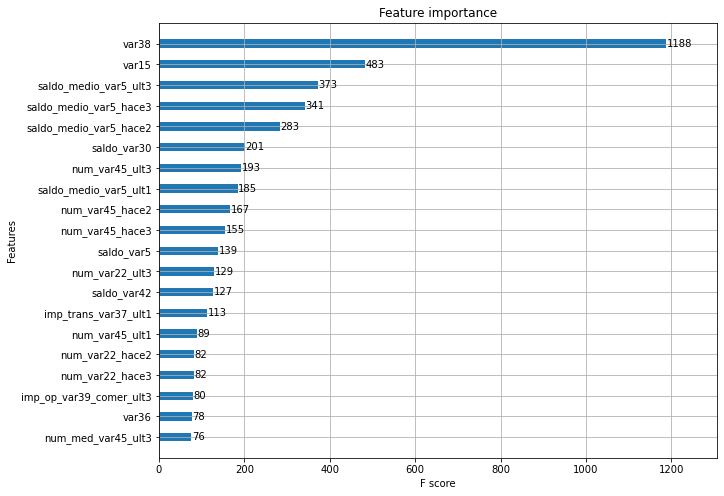

In [49]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf,ax=ax,max_num_features=20,height=0.4)